In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math as m

In [2]:
# Importing the OJ Distribution .csv files from the same folder where this python script is present

data1=np.genfromtxt('OJ_Distribution_medial_12634_embryo_LET502_RNAi.csv', dtype=float, delimiter=",",skip_header=1)
data2=np.genfromtxt('OJ_Distribution_medial_12635_embryo_LET502_RNAi.csv', dtype=float, delimiter=",",skip_header=1)
data3=np.genfromtxt('OJ_Distribution_medial_12636_embryo_LET502_RNAi.csv', dtype=float, delimiter=",",skip_header=1)
data4=np.genfromtxt('OJ_Distribution_medial_12637_embryo_LET502_RNAi.csv', dtype=float, delimiter=",",skip_header=1)
data5=np.genfromtxt('OJ_Distribution_medial_12639_embryo_LET502_RNAi.csv', dtype=float, delimiter=",",skip_header=1)
data6=np.genfromtxt('OJ_Distribution_medial_12640_embryo_LET502_RNAi.csv', dtype=float, delimiter=",",skip_header=1)
data7=np.genfromtxt('OJ_Distribution_medial_12643_embryo_LET502_RNAi.csv', dtype=float, delimiter=",",skip_header=1)
data8=np.genfromtxt('OJ_Distribution_medial_10154_LOWER_embryo_LET502_RNAi.csv', dtype=float, delimiter=",",skip_header=1)
data9=np.genfromtxt('OJ_Distribution_medial_10157_embryo_LET502_RNAi.csv', dtype=float, delimiter=",",skip_header=1)
data10=np.genfromtxt('OJ_Distribution_medial_10159_embryo_LET502_RNAi.csv', dtype=float, delimiter=",",skip_header=1)
data11=np.genfromtxt('OJ_Distribution_medial_10160_embryo_LET502_RNAi.csv', dtype=float, delimiter=",",skip_header=1)


In [3]:
# here k's represent the frame number of different videos which are used to measure the orientation during furrow ingression

k1=45     # for embryo no. 12634
k2=84     # for embryo no. 12635
k3=56     # for embryo no. 12636
k4=65     # for embryo no. 12637
k5=61     # for embryo no. 12639
k6=63     # for embryo no. 12640
k7=44     # for embryo no. 12643
k8=33     # for embryo no. 10154_lower
k9=51     # for embryo no. 10157
k10=64    # for embryo no. 10159
k11=77    # for embryo no. 10160

 
Embryos Mean data= [0.04216965625547217, 0.07901391126114267, 0.1166178406557789, 0.2834360046808313, 0.2860745319994533, 0.1926880551473217]
Embryos Normalised Mean data= [0.042169656255472164, 0.07901391126114266, 0.11661784065577888, 0.28343600468083124, 0.28607453199945326, 0.19268805514732165]
0.9999999999999999


(0.0, 0.6)

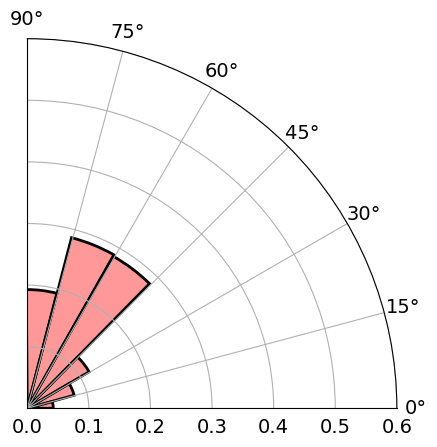

In [9]:
theta_deg=[7.5,23,38,53,68,83]   # The list 'theta_deg' stores the centre of different bins in degrees for the radial orienatation plot

theta_rad=[]
for i in (theta_deg):
    i=(i*m.pi)/180
    theta_rad.append(i)
    
#   "relative_hist" function: Takes the OJ Distribution data file along with its frame number to analyse.
def relative_hist(data,z):
    radii_normalized_data=[]
    x1=data[0:90,z+1]     # taking all fraction of filament data for angles between -89.5 deg -0.5 degrees.
    x2=data[90:180,z+1]   # taking all fraction of filament data for angles between 0.5 deg 89.5 degrees.
    x1_=np.flip(x1)

    x3=[]
    for i in range(len(x2)):
        x3.append(x1_[i]+x2[i]) # x3 stores the sum of the fraction of filaments from both positive and negative angles(adding filament fractions for mirror angles) 

    count=0
    value=0.0
    col_binned=[]
    for i in x3:
        value+=i
        count+=1
        if count==15:
            col_binned.append(value)  # Binning the fraction of filaments into 6 Wide Angle Bins
            count=0
            value=0.0
            
    total_filament=np.sum(data[:,z+1])    # total_filament stores the total fraction of filaments for the choosen frame
    if total_filament!=0:
        for j in col_binned:
            k=(j/total_filament)  
            radii_normalized_data.append(k)   # 'radii_normalized_data' stores the fraction of filaments for a given angle range in the choosen frame
    else:
        radii_normalized_data=[0 for i in range(len(col_binned))]
    return(radii_normalized_data)


radii_normalized_data1=relative_hist(data1,k1)
radii_normalized_data2=relative_hist(data2,k2)
radii_normalized_data3=relative_hist(data3,k3)
radii_normalized_data4=relative_hist(data4,k4)
radii_normalized_data5=relative_hist(data5,k5)
radii_normalized_data6=relative_hist(data6,k6)
radii_normalized_data7=relative_hist(data7,k7)
radii_normalized_data8=relative_hist(data8,k8)
radii_normalized_data9=relative_hist(data9,k9)
radii_normalized_data10=relative_hist(data10,k10)
radii_normalized_data11=relative_hist(data11,k11)

print(' ')

No_of_data=11   # Total no. of embryos data used

embryos_mean_normalized_filament=[]
embryos_mean_filament=[]

for i in range(len(theta_rad)):  # 'embryos_mean_filament' stores the mean fraction of total filaments in an angular bin across 11 embryos
    embryos_mean_filament.append((radii_normalized_data1[i]+radii_normalized_data2[i]+radii_normalized_data3[i]+radii_normalized_data4[i]+radii_normalized_data5[i]+radii_normalized_data6[i]+radii_normalized_data7[i]+radii_normalized_data8[i]+radii_normalized_data9[i]+radii_normalized_data10[i]+radii_normalized_data11[i])/No_of_data)
        
print('Embryos Mean data=',embryos_mean_filament) 
  
for j in range(len(theta_rad)):   #The values of 'embryos_mean_filament' is normalized so that the entire distribution sums to 1.
    embryos_mean_normalized_filament.append(embryos_mean_filament[j]/(np.sum(embryos_mean_filament)))
    
print('Embryos Normalised Mean data=',embryos_mean_normalized_filament)   # 'embryos_mean_normalized_filament' stores probability distribution of filament orientations (averaged across embryos and normalized to sum to 1)

width =0.26
bottom=0

ax= plt.subplot(111, polar=True)
ax.set_xlim(0,m.pi/2)

bars = ax.bar(theta_rad, embryos_mean_normalized_filament, width=width, bottom=bottom, align='center', color='r', alpha=0.4)

bars = ax.bar(theta_rad, embryos_mean_normalized_filament, width=width, bottom=bottom, align='center', color='none', edgecolor='black', linewidth=2)
print(np.sum(embryos_mean_normalized_filament))  # This show that the plotted data is normalized

ax.tick_params(labelsize=14)
ax.set_ylim(0,0.6)


# plt.savefig('Normalized_mean_of_embroys_0_90_let502_RNAi_Medial_region_during_ingression'.jpg',dpi=1200)